In [81]:
from phidl import Device, Layer, LayerSet
from phidl.device_layout import DeviceReference
from phidl import quickplot as qp
from phidl import set_quickplot_options

import phidl.geometry as pg
import phidl.utilities as pu
import phidl.routing as pr
import phidl.path as pp

import numpy as np
import pickle

from dataclasses import dataclass, field, replace

from typing import Tuple, Optional

import itertools

In [82]:
import importlib

from components import default_layerset
importlib.reload(default_layerset)
from components import frame
importlib.reload(frame)
from components import feedline
importlib.reload(feedline)
from components import spiral
importlib.reload(spiral)
from components import junction
importlib.reload(junction)
from components import resistor
importlib.reload(resistor)
from components import junction_resistor
importlib.reload(junction_resistor)
from components import ground_capacitor
importlib.reload(ground_capacitor)
from components import squid_resistor
importlib.reload(squid_resistor)
from components import junction_squid_resistor
importlib.reload(junction_squid_resistor)
from components import utils
importlib.reload(utils)

from components.default_layerset import default_ls
from components.frame import Frame, FrameParams
from components.feedline import Feedline, FeedlineParams, SquarePortParams
from components.spiral import Spiral, SpiralParams
from components.junction import JJ, JJParams
from components.resistor import Resistor, ResParams
from components.junction_resistor import JJResistor, CapaParams
from components.ground_capacitor import GroundCapa, GroundCapaParams
from components.squid_resistor import SquidResistor, SquidParams
from components.junction_squid_resistor import JJSquidResistor

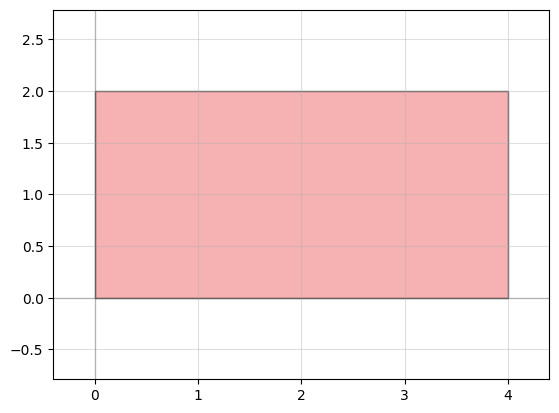

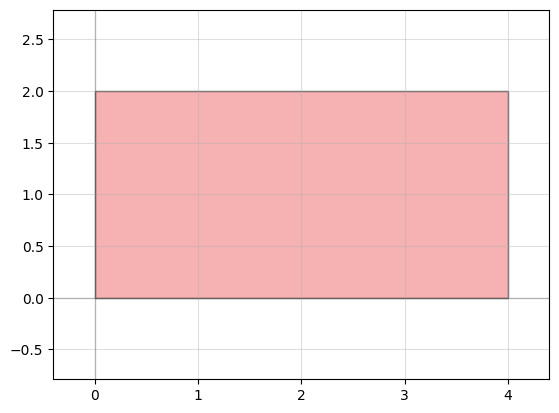

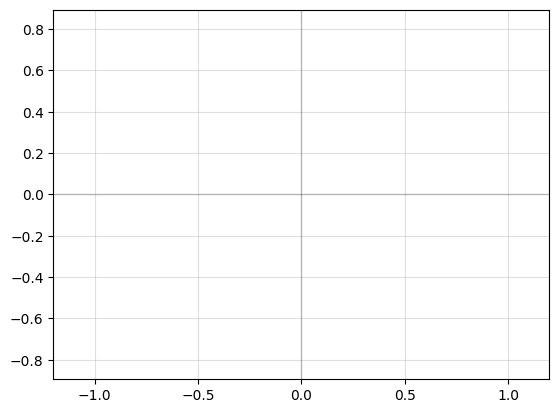

In [97]:
Device1 = Device('Device 1')

Device2 = Device('Device 2')
ref = Device1 << Device2

rect = Device2 << pg.rectangle()

qp(Device2)
qp(Device1)
Device2.remove(rect)
qp(Device1)

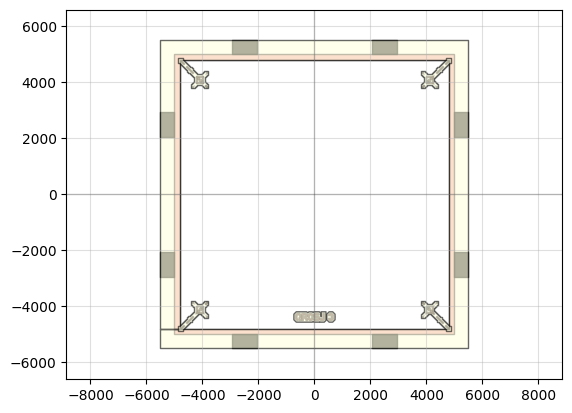

In [83]:
Chip = Device('Chip')

frame = Frame()
frame.generate_frame(FrameParams(sample_name='QRCSJ 3'))

Chip << frame.device

qp(Chip)
set_quickplot_options(show_subports=False)

In [84]:
# with open('feedline_top.pkl', 'rb') as f:
#     feedline_top = pickle.load(f)

# Feedline_Top = Chip << feedline_top.device

# Feedline_Top.connect('out', frame.device.ports['pcb 5'])

# qp(Chip)

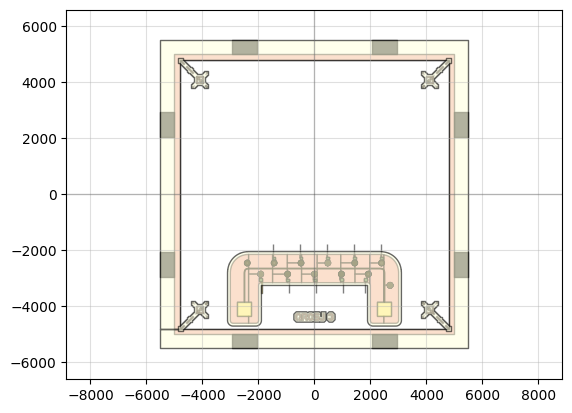

In [85]:
with open('feedline_bot.pkl', 'rb') as f:
    feedline_bot = pickle.load(f)

Feedline_Bot = Chip << feedline_bot.device

Feedline_Bot.connect('in', frame.device.ports['pcb 1'])

qp(Chip)

In [86]:
# with open('feedline_right.pkl', 'rb') as f:
#     feedline_right = pickle.load(f)

# Feedline_Right = Chip << feedline_right.device

# Feedline_Right.connect('in right', frame.device.ports['pcb 3'])

# qp(Chip)

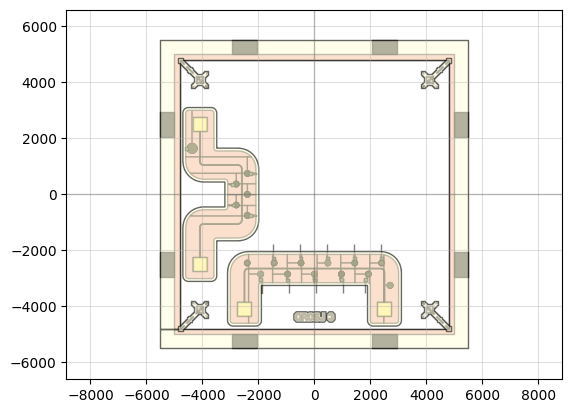

In [87]:
with open('feedline_left.pkl', 'rb') as f:
    feedline_left: Feedline = pickle.load(f)

Feedline_Left = Chip << feedline_left.device

Feedline_Left.connect('in right', frame.device.ports['pcb 7'])

qp(Chip)

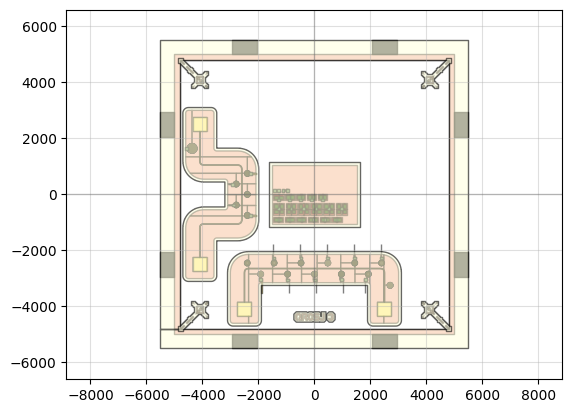

In [88]:
with open('test_structures.pkl', 'rb') as f:
    Test_Structures = pickle.load(f)

Test_Structures = Chip << Test_Structures

Test_Structures.move(Test_Structures.center, (0,0))

qp(Chip)

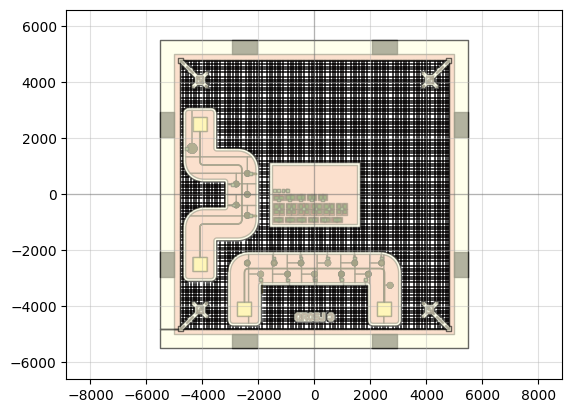

In [89]:
# generate ground plane

Groundplane = pg.fill_rectangle(
                    D = Chip,
                    fill_size= (15,15),
                    avoid_layers=[default_ls['ground_avoidance']],
                    margin= 0,
                    fill_layers= [default_ls['optical']],
                    fill_densities= 0.111,
                    fill_inverted=False)

Chip << Groundplane

qp(Chip)

In [90]:
Chip.flatten().write_gds('QRCSJ_3.gds')

'QRCSJ_3.gds'

In [91]:
exposition_layers = [default_ls['ebeam'], default_ls['ebeam_high'], 
                     default_ls['undercut'], default_ls['jj_undercut']]

for i, ebeam_dose in enumerate(default_layerset.ebeam_test_doses):
    exposition_layers.append(default_ls[f'ebeam_test_{i}'])

for i, undercut_dose in enumerate(default_layerset.undercut_test_doses):
    exposition_layers.append(default_ls[f'undercut_test_{i}'])

for i, ebeam_dose in enumerate(default_layerset.ebeam_log_test_doses):
    exposition_layers.append(default_ls[f'ebeam_log_test_{i}'])

for i, undercut_dose in enumerate(default_layerset.undercut_log_test_doses):
    exposition_layers.append(default_ls[f'undercut_log_test_{i}'])

#example gds path: D:\Alex\Ebeam litho\QRCSJ_R7\Run 2\QRCSJ_R7_v2.gds

utils.write_position_list("ebeam_positionlist",
                          "D:\Alex\Ebeam litho\QRCSJ_3\Run 1\QRCSJ_3.gds",
                          Chip,
                          [default_ls['writefield_ebeam']],
                          [default_ls['working_area_ebeam']],
                          exposition_layers)

In [92]:

#example gds path: D:\Alex\Ebeam litho\QRCSJ_R7\Run 2\QRCSJ_R7_v2.gds

utils.write_position_list("test_ebeam",
                          "C:\\Users\\aw270929\\scripta CdF\\users\\Alex\\phidl\\QRCSJ\\Resistors\\QRCSJ_3\\QRCSJ_3.gds",
                          Chip,
                          [default_ls['writefield_ebeam']],
                          [default_ls['working_area_ebeam']],
                          exposition_layers)

In [93]:
exposition_layers = [default_ls['ebeam_strong']]

#example gds path: D:\Alex\Ebeam litho\QRCSJ_R7\Run 2\QRCSJ_R7_v2.gds

utils.write_position_list("test_ebeam_strong",
                          "C:\\Users\\aw270929\\scripta CdF\\users\\Alex\\phidl\\QRCSJ\\Resistors\\QRCSJ_3\\QRCSJ_3.gds",
                          Chip,
                          [default_ls['writefield_ebeam_strong']],
                          [default_ls['working_area_ebeam_strong']],
                          exposition_layers)

In [94]:

#example gds path: D:\Alex\Ebeam litho\QRCSJ_R7\Run 2\QRCSJ_R7_v2.gds

utils.write_position_list("ebeam_strong_positionlist",
                          "D:\Alex\Ebeam litho\QRCSJ_3\Run 1\QRCSJ_3.gds",
                          Chip,
                          [default_ls['writefield_ebeam_strong']],
                          [default_ls['working_area_ebeam_strong']],
                          exposition_layers)